In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
heart = pd.read_excel(r'C:\Users\kavya\Downloads\Decision Tree (1)\Decision Tree\heart_disease.xlsx', sheet_name="Heart_disease")

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
heart.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [9]:
heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

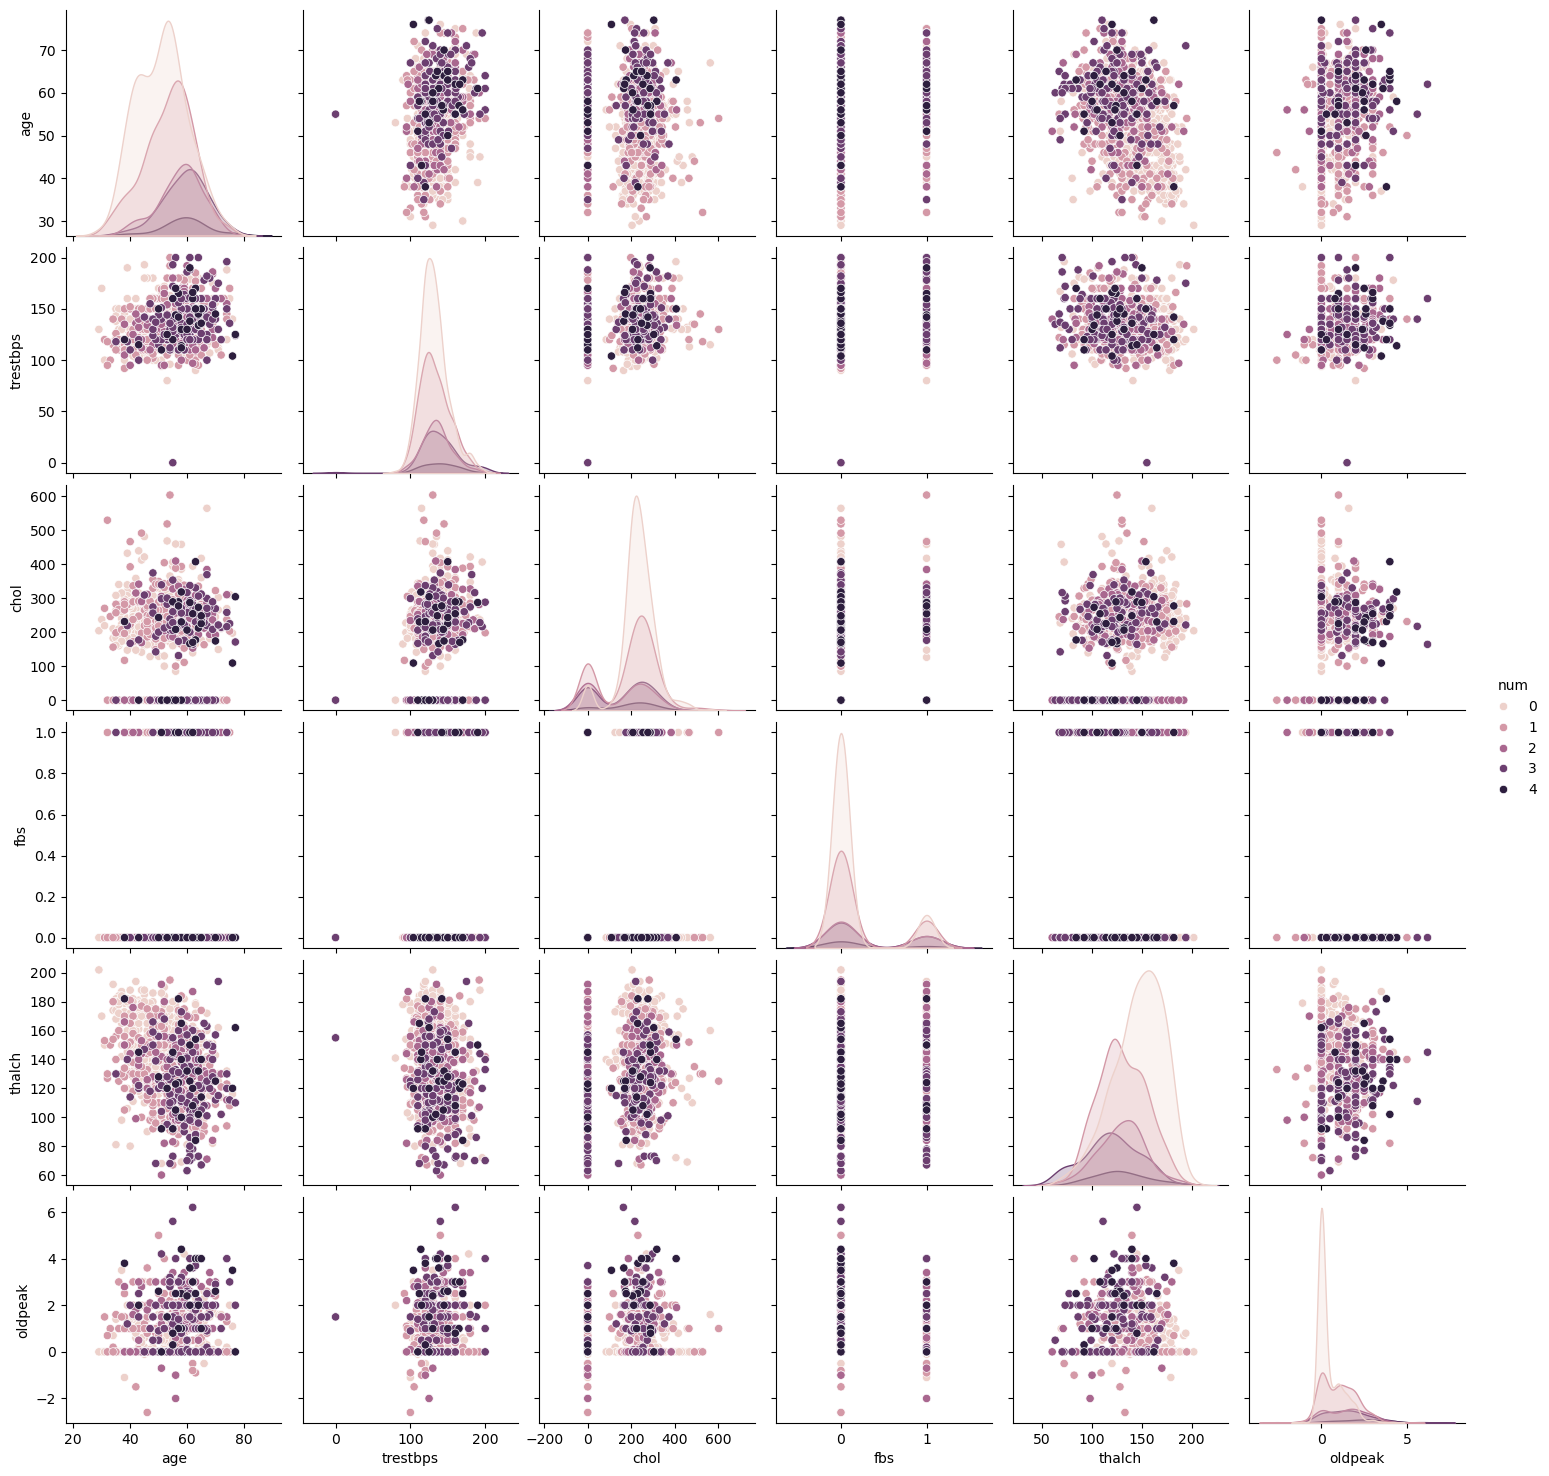

In [11]:
sns.pairplot(heart, hue="num")
plt.show()

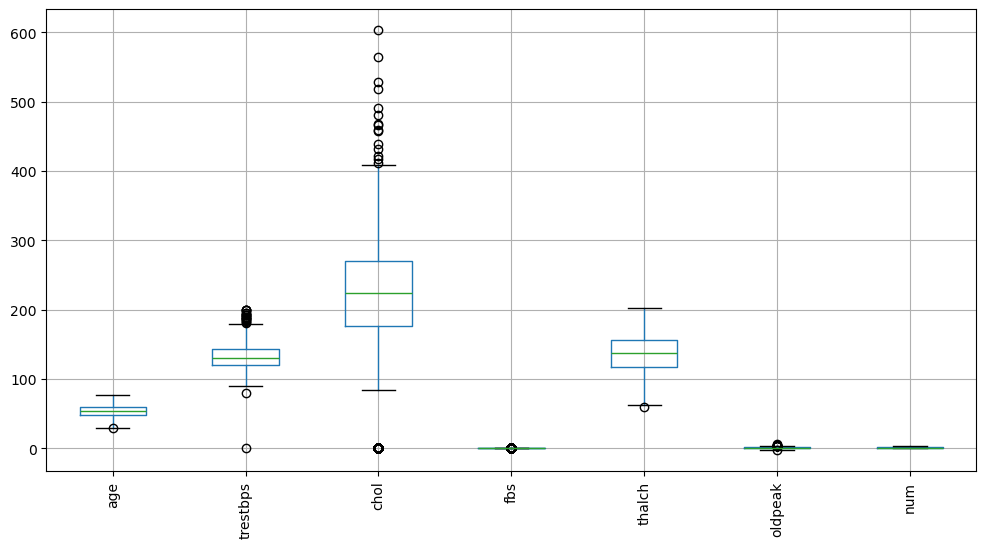

In [13]:
plt.figure(figsize=(12, 6))
heart.boxplot()
plt.xticks(rotation=90)
plt.show()


In [15]:
categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
label_encoders = {}
for col in categorical_cols:
    heart[col] = heart[col].astype(str)  
    le = LabelEncoder()
    heart[col] = le.fit_transform(heart[col])
    label_encoders[col] = le

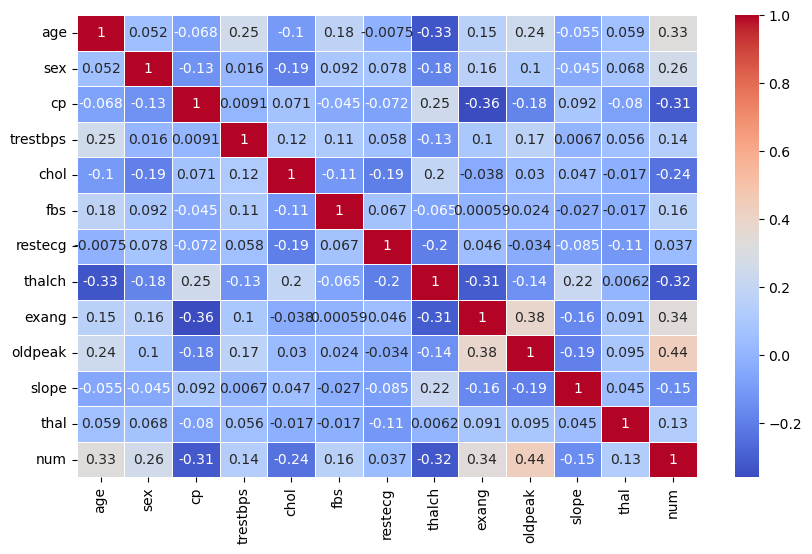

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(heart.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

In [19]:
heart['oldpeak'].fillna(heart['oldpeak'].median(), inplace=True)

In [21]:
X = heart.drop(columns=['num'])
y = heart['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [25]:
y_pred = dt.predict(X_test)

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.532967032967033
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74        89
           1       0.38      0.38      0.38        48
           2       0.43      0.45      0.44        22
           3       0.12      0.12      0.12        17
           4       0.00      0.00      0.00         6

    accuracy                           0.53       182
   macro avg       0.33      0.34      0.34       182
weighted avg       0.52      0.53      0.53       182

Confusion Matrix:
 [[67 13  4  5  0]
 [18 18  7  5  0]
 [ 3  3 10  5  1]
 [ 4  9  0  2  2]
 [ 0  4  2  0  0]]


In [29]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [31]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [33]:
print("Best Parameters:", grid_search.best_params_)
dt_best = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [35]:
y_pred_best = dt_best.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))


Tuned Model Accuracy: 0.5714285714285714


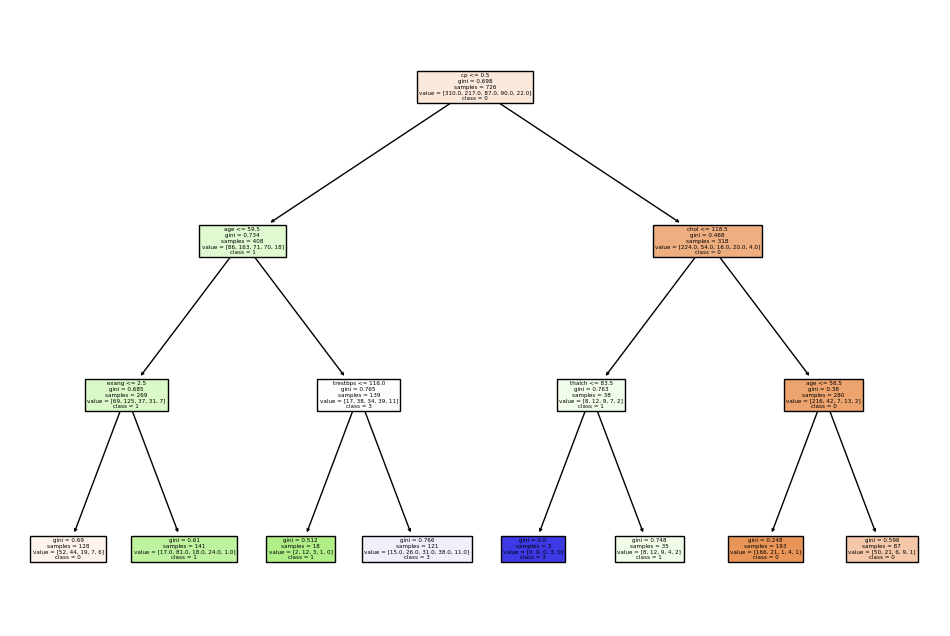

In [47]:

plt.figure(figsize=(12, 8))
plot_tree(dt_best, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in y.unique()])
plt.show()


### INTERVIEW QUESTIONS

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

1.max_depth – Limits tree depth; prevents overfitting by restricting complexity.
2.min_samples_split – Minimum samples needed to split a node; higher values reduce overfitting.
3.min_samples_leaf – Minimum samples per leaf; larger values create a simpler tree.
4.criterion (gini or entropy) – Determines how splits are chosen; affects accuracy and computation.
5.max_features – Limits the number of features considered per split; helps reduce variance.
6.max_leaf_nodes – Restricts the number of leaf nodes; controls overfitting.

2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding 🏷️

Assigns a unique number to each category.
Suitable for ordinal data (e.g., "Low" = 0, "Medium" = 1, "High" = 2).
May create false numerical relationships.
One-Hot Encoding 🔥

Creates binary columns for each category.
Suitable for nominal (unordered) data (e.g., "Red" → [1,0,0], "Blue" → [0,1,0]).
Increases feature dimensions.
